# Probability encoding 

**Definition**

* Replacing categorical variables with the ratio of the probability of the target being 1 to the probability of target being 0 within the category. 
* For each category, we calculate the mean of target 1, that is probability of the target being 1 (P(1)), and the probability of the target being 0 (P(0)), And then, we calculate the ratio P(1)/P(0), and replace the categories by that ratio. 
* Can be only used for binary classification. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df = pd.read_csv('../data/titanic.csv', usecols=['cabin', 'sex', 'embarked', 'survived'])

In [3]:
df

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S
...,...,...,...,...
1304,0,female,NaN,C
1305,0,female,NaN,C
1306,0,male,NaN,C
1307,0,male,NaN,C


In [4]:
for col in df.columns:
    print(f"{col}: {len(df[col].unique())} labels")

survived: 2 labels
sex: 2 labels
cabin: 182 labels
embarked: 4 labels


# Convert variables

In [5]:
df['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [6]:
df['cabin'] = df['cabin'].astype(str).str[0]

In [7]:
df['cabin'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

# Drop observations

### Embarked

In [8]:
df['embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [9]:
# as this is all survived, let's ignore embarked=NaN for now
df[df['embarked'].isna()]

,survived,sex,cabin,embarked
168,1,female,B,NaN
284,1,female,B,NaN


In [10]:
df.dropna(subset=['embarked'], inplace=True)
df.shape

(1307, 4)

### Cabin

In [11]:
# As there are two few observations, we will remove cabin=T
df = df[df['cabin'] != 'T']
df.shape

(1306, 4)

### Check unique labels

In [12]:
for col in df.columns:
    print(f"{col}: {len(df[col].unique())} labels")

survived: 2 labels
sex: 2 labels
cabin: 8 labels
embarked: 3 labels


In [13]:
# check unique categories in each variable
for col in df.columns:
    print(col)
    print(df[col].unique())
    print()

survived
[1 0]

sex
['female' 'male']

cabin
['B' 'C' 'E' 'D' 'A' 'n' 'F' 'G']

embarked
['S' 'C' 'Q']



# Split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, # include target 
                                                    df['survived'],
                                                   test_size=0.3, 
                                                   random_state=0)
X_train.shape, X_test.shape

((914, 4), (392, 4))

# Check the original relationship

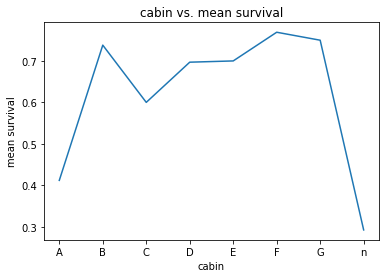

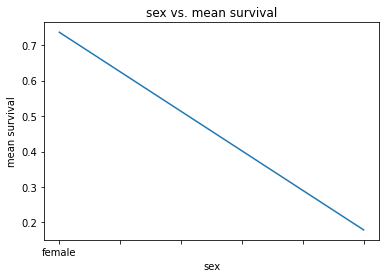

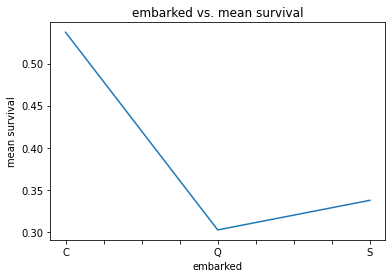

In [15]:
for col in ['cabin', 'sex', 'embarked']:
    fig, ax = plt.subplots()
    X_train.groupby([col])['survived'].mean().plot()
    plt.title(f'{col} vs. mean survival')
    plt.ylabel('mean survival')
    plt.show()

# Probability ratio encoding

In [16]:
col = 'cabin'
target_col = 'survived'

prob_df = pd.DataFrame(X_train.groupby(col)[target_col].mean())
prob_df['non_'+target_col] = 1 - prob_df[target_col]
prob_df['ratio'] = prob_df[target_col]/prob_df['non_'+target_col]
prob_df

,survived,non_survived,ratio
cabin,,,
A,0.411765,0.588235,0.700000
B,0.738095,0.261905,2.818182
C,0.600000,0.400000,1.500000
D,0.696970,0.303030,2.300000
E,0.700000,0.300000,2.333333
F,0.769231,0.230769,3.333333
G,0.750000,0.250000,3.000000
n,0.292199,0.707801,0.412826


In [17]:
ordered_labels = prob_df['ratio'].to_dict()
ordered_labels

{'A': 0.7,
 'B': 2.818181818181819,
 'C': 1.4999999999999998,
 'D': 2.3000000000000007,
 'E': 2.333333333333333,
 'F': 3.333333333333334,
 'G': 3.0,
 'n': 0.4128256513026052}

In [18]:
# Cleanup code 
def get_probability_encoder(df, col, target_col):
    prob_df = pd.DataFrame(X_train.groupby(col)[target_col].mean())
    prob_df['non_'+target_col] = 1 - prob_df[target_col]
    prob_df['ratio'] = prob_df[target_col]/prob_df['non_'+target_col]
    
    # to dictionary 
    ordered_labels = prob_df['ratio'].to_dict()
    
    return ordered_labels

In [19]:
# get the encoder 
encoder = {}
for col in ['cabin', 'sex', 'embarked']:
    encoder[col] = get_probability_encoder(X_train, col, 'survived')

In [20]:
# apply 
for col in ['cabin', 'sex', 'embarked']:
    X_train[col] = X_train[col].map(encoder[col])
    X_test[col] = X_test[col].map(encoder[col])

/Users/minkyung/.local/share/virtualenvs/feature-engineering-ZjNb4T9G/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/minkyung/.local/share/virtualenvs/feature-engineering-ZjNb4T9G/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
X_train.head()

,survived,sex,cabin,embarked
843,0,0.218107,0.412826,0.509434
869,0,0.218107,0.412826,0.509434
430,1,2.788235,0.412826,0.509434
481,1,2.788235,0.412826,1.160920
1308,0,0.218107,0.412826,0.509434


# Check post-relationship between variables and target

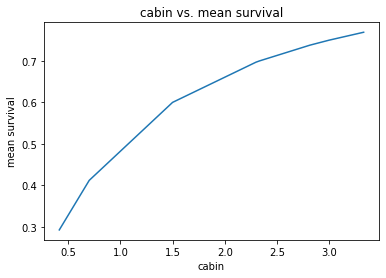

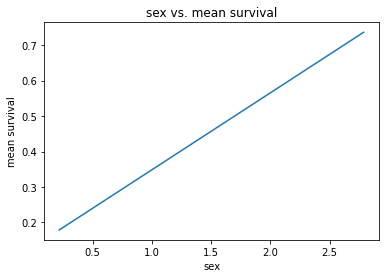

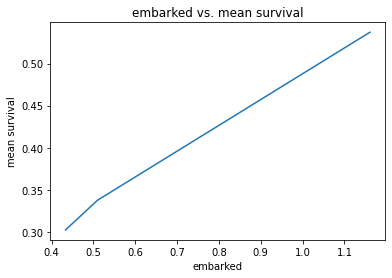

In [22]:
for col in ['cabin', 'sex', 'embarked']:
    fig, ax = plt.subplots()
    X_train.groupby([col])['survived'].mean().plot()
    plt.title(f'{col} vs. mean survival')
    plt.ylabel('mean survival')
    plt.show()